# K-Nearest Neighbors (KNN) for Predicting House Prices

**Name**:  Conor Brooke  
**Student-ID**:  C00260735  
**Date**:  15/02/2024  
**Link To Notebook Followed**:  [Kaggle](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors)  

  
## Notebook Overview

This notebook covers a detailed exploration of K-Nearest Neighbors (KNN), a classification algorithm known for its effectiveness in handling high-dimensional data. The focus is on applying SVM to a loan prediction classification task using a dataset `loan_data`. The analysis incudes various stages, including data understanding, preprocessing, and model development, with an emphasis on understanding SVM concepts such as discriminative classification, decision boundaries, and the kernel trick. Through this exploration, the notebook aims to demonstrate SVM's practical utility in predicting using classification, and offer insights into optimizing the model.



<br>  

> **Note**: This notebook is part of my Data Science Continuous Assessment portfolio. The notebook followed has been enhanced significantly from the original version downloaded from kaggle to deepen both theoretical and practical understanding of the underlying machine learning algorithm(s). The differences are documented in the notebooks log to track the evolution of the notebook and analyze the algorithm's performance.

# Notebook Log

## K-Nearest Neighbor (KNN)

K-Nearest Neighbor, or KNN, is a straightforward yet powerful algorithm within machine learning, tasked with classifying data points by considering those most similar to them. KNN works by looking at the 'K' closest data points (neighbors) to the point you're trying to classify. 'K' represents the chosen number of neighbors. The algorithm then counts the neighbors according to their respective categories (e.g., Car or Truck), with the prevailing category being assigned to the new point.

### Example: Vehicle Classification

Imagine a dataset of vehicles labeled either as "Car" or "Truck," described by attributes such as "weight" and "engine size." Employing KNN with K=5 to classify a vehicle involves the following steps:

1. **Select Features**: Comparison of vehicles is based on "weight" and "engine size."
2. **Choose K**: Opting for K=5 means analyzing the 5 nearest neighbors by these features.
3. **Calculate Distances**: The Euclidean distance metric is used to quantify the separation between the new vehicle and existing ones in the dataset.
4. **Identify Neighbors**: Finding the 5 vehicles in closest proximity to the new data point.
5. **Majority Vote**: Should the majority (e.g., 3 out of 5) of these neighbors be categorized as "Cars," the new vehicle is correctly classified as a "Car."

This methodology shows KNN's reliance on neighboring data points for predicting new entry classification.

### Considerations

KNN is easy to understand and implement, and it can be accurate with the right data. However, it can become slow if you have a lot of data as it needs to compare the new point to every other point in the dataset to find its nearest neighbors.


#### Strengths of KNN:
- **Simplicity**: KNN is intuitive and easy to implement, making it accessible for beginners.
- **Versatility**: It can be used for both classification and regression tasks.
- **No Model Assumptions**: Unlike many algorithms, KNN does not assume anything about the underlying data distribution.
- **Multi-class**: It can handle multi-class cases and is effective if the dataset has a good number of data points for each class.

#### Weaknesses of KNN:
- **Scalability**: KNN can be slow with large datasets because it needs to compute the distance to every training sample.
- **Memory Intensive**: Stores all the training data for prediction, requiring substantial memory as data size grows.
- **Sensitive to Irrelevant Features**: Performance can degrade with the inclusion of irrelevant or redundant features due to the distance calculation.
- **Distance Metric Tuning**: The choice of distance metric can significantly impact performance, and finding the right metric can be challenging.
- **Class Imbalance Issues**: KNN can perform poorly on imbalanced datasets since it relies on the majority vote of neighbors.






<br>
<br>  

### K-Nearest Neighbors (KNN) Classification on Iris Dataset

In this section, I'll demonstrate how to use the K-Nearest Neighbors (KNN) algorithm to classify instances of the Iris dataset. The Iris dataset is a classic dataset in the field of machine learning, consisting of 150 samples of iris flowers divided into 3 different species (Setosa, Versicolour, and Virginica), with 4 features measuring the lengths and the widths of the sepals and petals.

#### Dataset Used: [IRIS](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)

In [453]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

### Load the Iris Dataset

In [454]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [455]:
# Convert to Panda Data Frame for better visualization
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df = iris_df.assign(target=iris.target)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [456]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Split the Dataset

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling (Effective with KNN)

In [458]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the KNN Model

In [459]:
# Initialize KNN with n_neighbors=5
model = KNeighborsClassifier(n_neighbors=1)

# Fit the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Making Predictions and Evalutaing Model

In [460]:
y_pred = model.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [461]:
from sklearn.metrics import accuracy_score

# Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 100.00%


#### Dimensionality Reduction with PCA

Dimensionality reduction is a crucial step in data preprocessing, especially for visualization and to improve model performance by reducing the complexity of the data. Principal Component Analysis (PCA) is one of the most popular techniques for dimensionality reduction.

In [462]:
from sklearn.decomposition import PCA

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##### Apply PCA to reduce the dataset to 2 dimensions for visualization purposes.

In [463]:
# Initialize PCA and reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
df = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
df = pd.concat([df, pd.DataFrame(y, columns=['target'])], axis = 1)

##### Visualize the Iris dataset in the new two-dimensional space

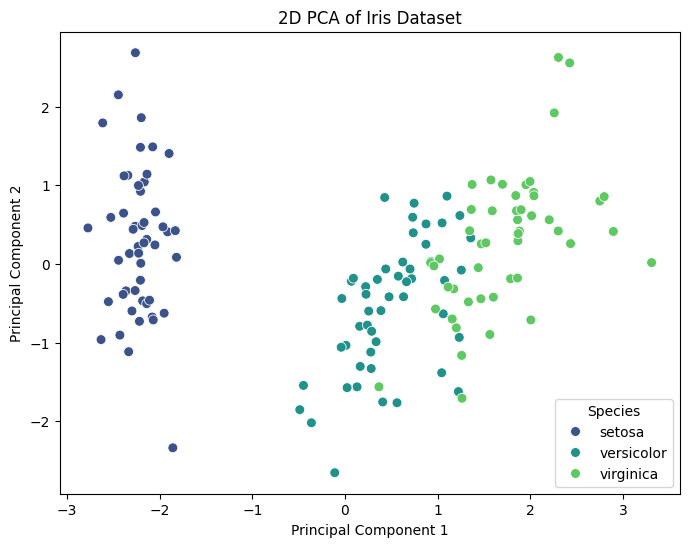

In [464]:
from matplotlib import pyplot as plt
import seaborn as sns

df['species'] = [iris.target_names[i] for i in df['target']]

# Plot using seaborn for a simpler syntax
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='species', data=df, palette='viridis', s=50).set_title('2D PCA of Iris Dataset')
plt.legend(title='Species')
plt.show()


This is a basic KNN model that can classify instances of the Iris dataset with great accuracy. Experimenting with different values of n_neighbors can help you understand the effect of this parameter on your model's performance.

<br>  


## Predicting House Prices in King County, USA

**Link To House Prices Dataset**:  [House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) 

<br>

## Data Understanding

### Initial Data Collection Report
- **House Sales in King County, USA**: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

### Data Description

- Size: 21613 entries
- Number of features: 
    -  1 Categorical feature
    -  20 Continuos features
- Null values: None
- Duplicate rows: 0

#### Features Breakdown
- `id`: Unique identifier for a house.
- `date`: The date the house was sold.
- `price`: The sale price of the house (target variable).
- `bedrooms`: Number of bedrooms in the house.
- `bathrooms`: Number of bathrooms in the house, where .5 accounts for a room with a toilet but no shower. (Weird USA categorization)
- `sqft_living`: Square footage of the home's interior living space.
- `sqft_lot`: Square footage of the land space.
- `floors`: Number of floors (levels) in the house.
- `waterfront`: A variable indicating whether the house has a waterfront view (1: Yes, 0: No).
- `view`: An index from 0 to 4 of how good the view of the property was.
- `condition`: An index from 1 to 5 on the condition of the house.
- `grade`: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 is an average, and 11-13 have a high quality.
- `sqft_above`: Square footage of house apart from basement.
- `sqft_basement`: Square footage of the basement.
- `yr_built`: The year the house was initially built.
- `yr_renovated`: The year of the house's last renovation.
- `zipcode`: What zipcode area the house is in.
- `lat`: Latitude coordinate of the house.
- `long`: Longitude coordinate of the house.
- `sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors.
- `sqft_lot15`: The square footage of the land lots of the nearest 15 neighbors.

### Correlation Insights

- **Positive Correlations**: Features such as `int.rate`, `inq.last.6mths`, and `purpose_small_business` show positive correlations with `not.fully.paid`, indicating a higher probability of loan payback failure as these values increase. `int.rate` shows the highest positive correlation at 0.159552, displaying the impact of interest rates on repayment risks.

- **Negative Correlations**: `fico` and `credit.policy` have negative correlations, suggesting that higher FICO scores and better credit policy are strongly linked to successful loan repayments.


### Exploratory Data Analysis (EDA)

#### General Observations

- **Distribution of House Prices Histogram**: 

    - **Mean and Median**: The mean price of houses is $540,088, suggesting that on average, houses in King County are priced around this value. However, the median price of $450,000 is lower than the mean, indicating a right-skewed distribution where a significant number of houses are priced below the average, but high-value outliers pull the mean higher.

    - **Dispersion**: The standard deviation is quite high at $367,127, indicating a wide variance in house prices within the county.

    - **Outliers**: The obserrvation of outliers reveals an upper bound for outliers at the $1,000,000. With over 1000 potential outliers identified, it's clear that there's a large number of high-priced houses that deviate from the typical price range.

    - **Potential Outliers Sample**: The samples of potential outliers with prices significantly above the upper bound for outliers showcase properties that are exceptional either in terms of amenities (e.g., number of bedrooms, bathrooms, living space) or possibly their location (e.g., waterfront properties).

- **Relationship Between Features and Target Variable**: 

    - **House Price vs. Living Area**:
    The relationship between house price and living area (square footage) generally indicates that larger homes have higher prices. Most houses in the dataset fall within the range of 1,000 to 3,500 square feet. There is a clear trend where an increase in living area is associated with an increase in price.

    - **House Prices by Number of Bedrooms**:
    The number of bedrooms within a house also influences its market price. Properties with more bedrooms, up to 6, often indicate higher value, suggesting that houses designed to accommodate more people or provide additional space for offices, guest rooms, or other functions are priced premiumly. However, this trend does not hold true across all properties, indicating that other factors such as the size of the bedrooms, overall living space, and property location also play significant roles in determining price.

- **Exploring Feature Correlation Matrix**: 
### Overview of Feature Correlations with House Price

- **High Correlation**: Features like `sqft_living`, `grade`, `sqft_above`, `sqft_living15`, and `bathrooms` show strong positive correlations with `price`. These features are key indicators of house value and should be considered in the model.

- **Moderate Correlation**: `view`, `sqft_basement`, `bedrooms`, `lat`, and `waterfront` exhibit moderate positive correlations. These features also influence the price significantly but to a lesser extent than the high correlation features.

- **Low Correlation**: `floors`, `yr_renovated`, `sqft_lot`, `sqft_lot15`, `yr_built`, and `condition` have low positive correlations with `price`. While they do have an impact, it is relatively minor.

- **Negligible or Negative Correlation**: `long`, `days_since_min_date`, `date`, `id`, and `zipcode` show either very low positive, negligible, or negative correlations with `price`. These features are unlikely to be useful predictors of house price due to their weak correlations.

In [465]:
import seaborn as sns
import pandas as pd

house_prices = pd.read_csv('Datasets/kc_house_data.csv')

In [466]:
house_prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [467]:
print(len(house_prices))

21613


In [468]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [469]:
house_prices['view'].max()

4

In [470]:
house_prices['grade'].max()

13

In [471]:
house_prices['condition'].max()

5

In [472]:
house_prices['condition'].min()

1

In [473]:
#Checking for null values
house_prices.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [474]:
house_prices.duplicated().sum()

0

In [475]:
house_prices.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Analyzing the distribution of the target variable, which is the 'price' column

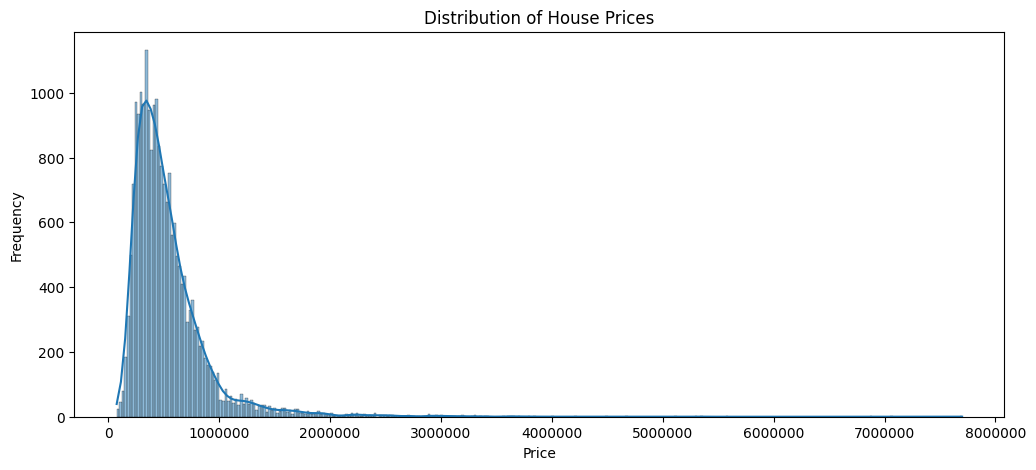

In [476]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

sns.histplot(data=house_prices, x='price', kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x', useOffset=False)

plt.show()


In [477]:
house_prices['price'].max()

7700000.0

In [478]:
# Calculate basic statistics
mean_price = house_prices['price'].mean()
median_price = house_prices['price'].median()
mode_price = house_prices['price'].mode()[0]
std_dev_price = house_prices['price'].std()

# Print the statistics
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Standard Deviation: {std_dev_price}")

Mean Price: 540088.1417665294
Median Price: 450000.0
Mode Price: 350000.0
Standard Deviation: 367127.19648269983


#### Relationship Between Features and Target Variable

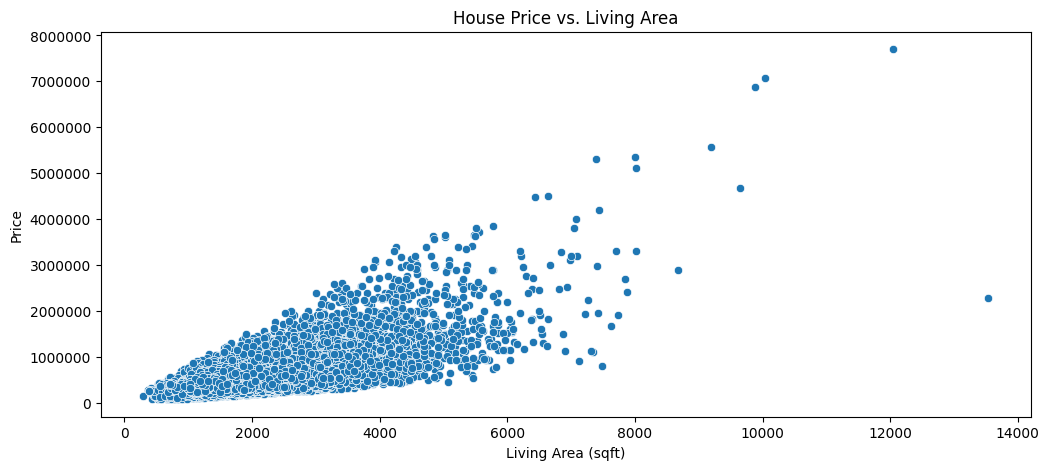

In [479]:
plt.figure(figsize=(12, 5))

sns.scatterplot(data=house_prices, x='sqft_living', y='price')
plt.title('House Price vs. Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')

plt.ticklabel_format(style='plain', axis='y', useOffset=False)

plt.show()


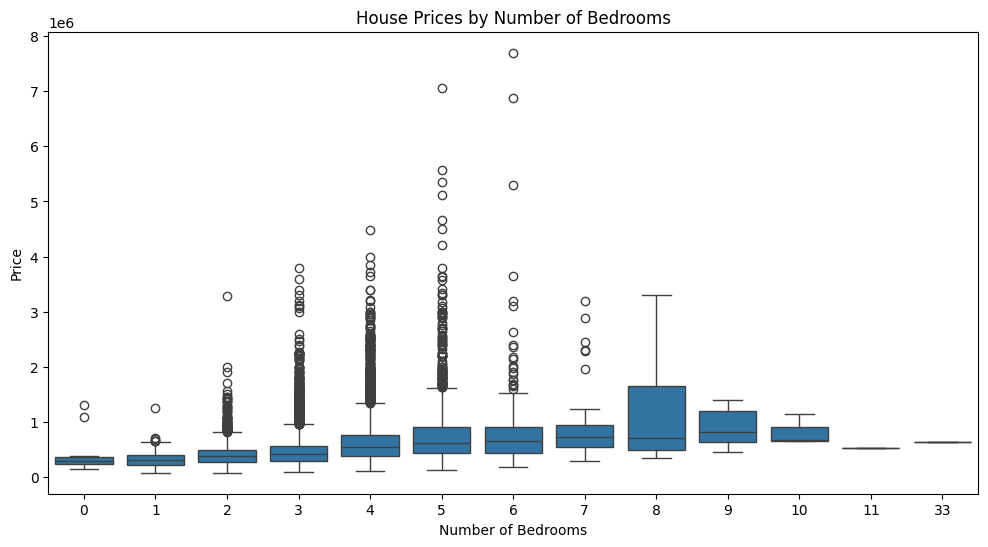

In [480]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for bedrooms vs. price
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=house_prices)
plt.title('House Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


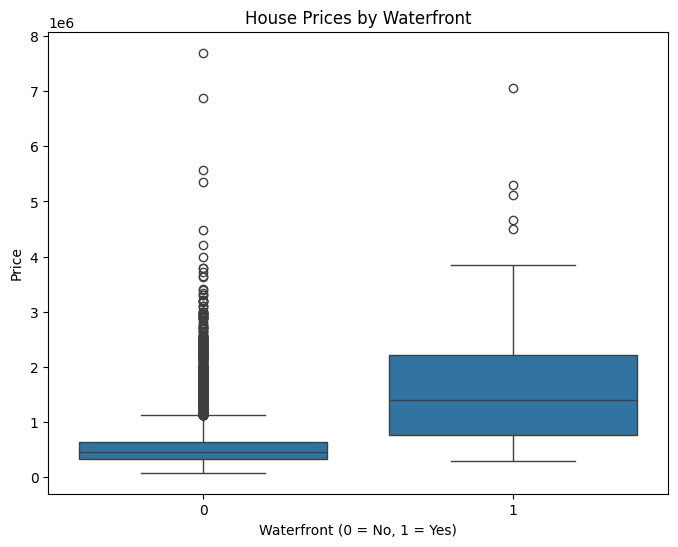

In [481]:
# Box plot for waterfront vs. price
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=house_prices)
plt.title('House Prices by Waterfront')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()


<br>  


## Data Preparation

In this section, I outline the steps taken to clean and prepare the data for modeling.
### Data Cleaning Steps

1. **Dropping Features with Low Correlation**: Features such as `id`, `zipcode`, `long`, `days_since_min_date`, and `date` show very low correlations with the target variable `price`. These features are likely to contribute little to the predictive power of a model for house prices due to their weak relationships. Consequently, dropping these features can simplify the model without significantly affecting its performance.

```python
    house_price.drop(['id', 'zipcode', 'long', 'days_since_min_date', 'date'], axis=1, inplace=True)
```

2. **Outlier Removal**: To minimize the impact of extreme values on our model, I removed outliers using the Interquartile Range (IQR) method with a multiplier of 2 for both Q1 and Q3. This less stricked approach aims to retain more data while still lowering the influence of outliers (usually 1.5, I used 2 as the dataset is already small).

```python
    outliers = ((filter_house_prices < (Q1 - 3 * IQR)) | (filter_house_prices > (Q3 + 3 * IQR)))
```
Removed 4000 outliers out of 21600,  which is approximately 18%. This means a large portion of the dataset has been removed, which might lead to overfitting.
 
### Feature Engineering

1. **Scaling**: I applied `StandardScaler` and `MinMaxScaler` from `sklearn.preprocessing` to standardize our dataset.
  
    - **Standard Scaling** normalizes the features such that they have a mean of 0 and a standard deviation of 1. This method is helpful if the model assumes a normal distribution of the data.

    - **Min-Max Scaling** adjusts the features so that they range from 0 to 1. This scaling is useful when the model needs the features to have a specific scale. 

<br>  

In [482]:

# Convert 'date' from categorical to a continuous value by calculating the number of days from the earliest date
house_prices['date'] = pd.to_datetime(house_prices['date'])  # Ensure 'date' is in datetime format
min_date = house_prices['date'].min()
house_prices['days_since_min_date'] = (house_prices['date'] - min_date).dt.days


In [483]:
house_prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days_since_min_date
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,164
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,221
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,299
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,221
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,19
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,297
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,52
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,259


Getting Correlation Information for Data Understanding section

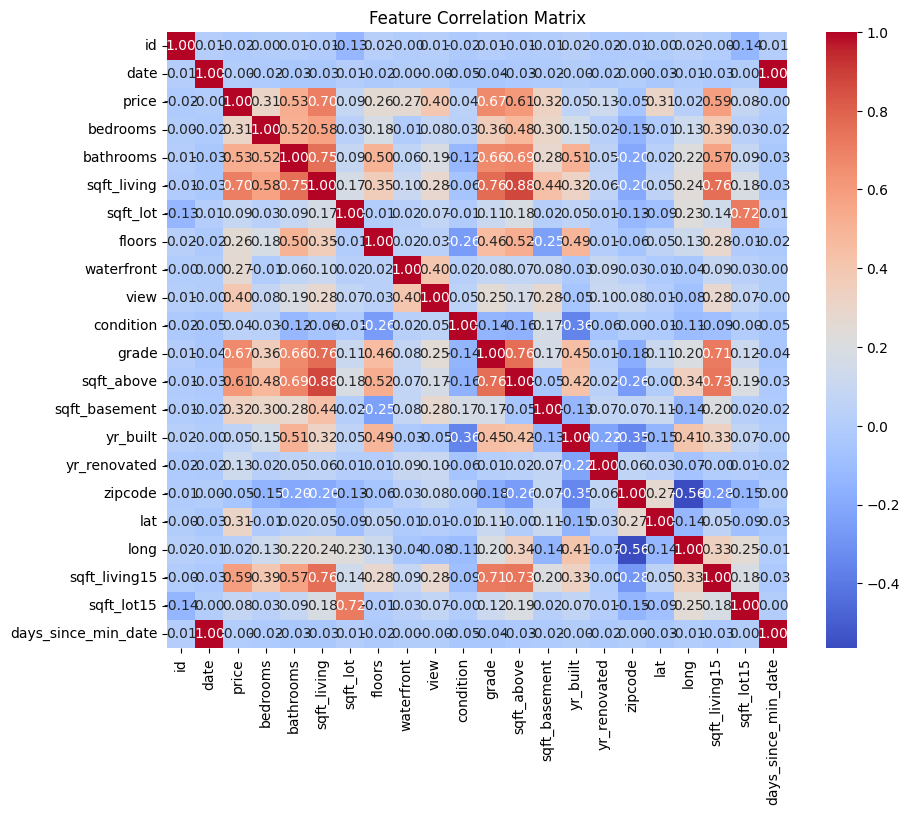

Correlations with the target variable 'price':
price                  1.000000
sqft_living            0.702035
grade                  0.667434
sqft_above             0.605567
sqft_living15          0.585379
bathrooms              0.525138
view                   0.397293
sqft_basement          0.323816
bedrooms               0.308350
lat                    0.307003
waterfront             0.266369
floors                 0.256794
yr_renovated           0.126434
sqft_lot               0.089661
sqft_lot15             0.082447
yr_built               0.054012
condition              0.036362
long                   0.021626
days_since_min_date   -0.004357
date                  -0.004357
id                    -0.016762
zipcode               -0.053203
Name: price, dtype: float64


In [484]:
# Compute the correlation matrix
corr_matrix = house_prices.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Print out the correlations of features with the target variable 'price'
print("Correlations with the target variable 'price':")
print(corr_matrix['price'].sort_values(ascending=False))

In [485]:
filter_house_prices = house_prices.drop(['id', 'zipcode', 'long', 'days_since_min_date', 'date'], axis=1)

In [486]:
filter_house_prices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,1800,7503


In [487]:
from sklearn.preprocessing import StandardScaler

filteredX = filter_house_prices.drop(['price'], axis=1)  # Features
filteredy = filter_house_prices['price']  # Target variable

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
filtered_X_Scaled = scaler.fit_transform(filteredX)


In [488]:
# Calculate Q1, Q3, and IQR for each column
Q1 = filter_house_prices.quantile(0.25)
Q3 = filter_house_prices.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using a 1.5 IQR multiplier
outliers = ((filter_house_prices < (Q1 - 2 * IQR)) | (filter_house_prices > (Q3 + 2 * IQR)))

# Filter out outliers
filtered_house_prices_no_outliers = filter_house_prices[~outliers.any(axis=1)]


In [489]:
print(len(filtered_house_prices_no_outliers))

16396


In [490]:
no_Outliers_X = filtered_house_prices_no_outliers.drop(['price'], axis=1)  # Features
no_Outliers_y = filtered_house_prices_no_outliers['price']  # Target variable

# Fit the scaler to the data and transform it
no_Outliers_X_Scaled = scaler.fit_transform(no_Outliers_X)


In [491]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
X_min_max_scaled = min_max_scaler.fit_transform(no_Outliers_X)

## Modeling

### Model Selection

- **Predicting House Prices Using KNN Regression: Basic Model**:

- **Predicting House Prices Using KNN Regression: Features Scaled Model**:

- **Predicting House Prices Using KNN Regression: Features Scaled with Outliers removed Model**:

### Model Building and Tuning

- **Predicting House Prices Using KNN Regression: Basic Model**:
    - Test set: 20%
    - SVC (RBF kernel): 
      ```
      [[1421    0]
      [ 269    0]]
      ```
    - LinearSVC:
      ```
      [[798 813]
      [143 162]]
      ```

- **Predicting House Prices Using KNN Regression: Features Scaled Model**:
    - Test set: 10%
    - After applying SMOTE:
      ```
      [[510 215]
      [ 52  68]]
      ```

- **Predicting House Prices Using KNN Regression: Features Scaled with Outliers removed Model**:
    - Using a probability threshold adjustment on the SMOTE-enhanced dataset:
      ```
      [[496 229]
      [ 46  74]]
      ```

### Modeling Challenges

- 
- 
- 
  

#### Basic Model: Will be used for comparison

In [492]:
house_prices.drop('date', axis=1, inplace=True)

# Assuming 'house_prices' is your DataFrame
X = house_prices.drop('price', axis=1)
y = house_prices['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [493]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Training the model
knn_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluating the model using the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE) on Test Set: 318011.63749443466
Mean Absolute Error (MAE): 163037.7396715244


In [494]:
def graphResiduals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.show()
    print(residuals)



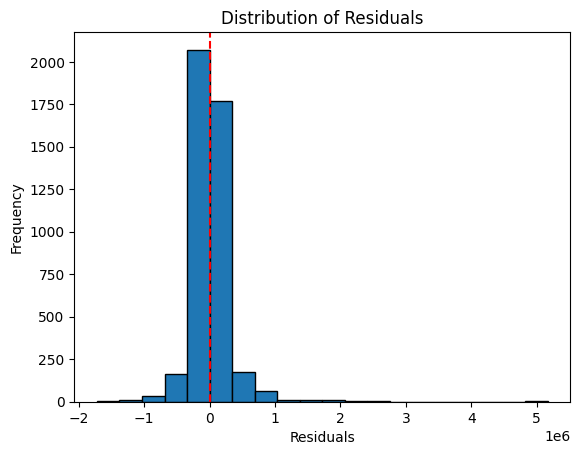

735      -15500.0
2830     139198.6
4106     354200.0
16218    851600.0
19964    122680.0
           ...   
13674     -4590.0
20377     38265.0
8805    -139400.0
10168   -319600.0
2522     -84500.0
Name: price, Length: 4323, dtype: float64


In [495]:
graphResiduals(y_test, y_pred)

In [496]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train_scaled, y_train)

y_pred = knn_regressor.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE) on Test Set: 183703.59606028371
Mean Absolute Error (MAE): 96947.67443904697


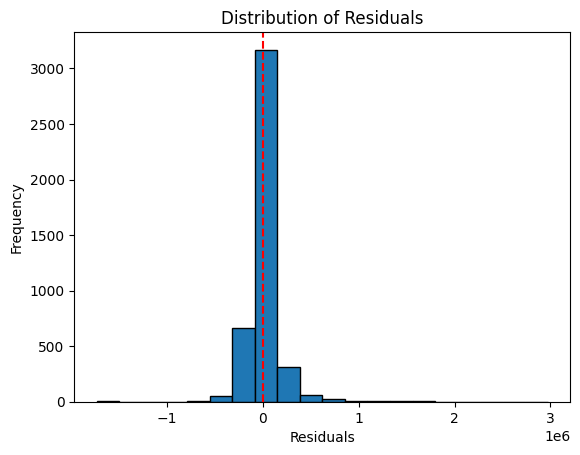

735      -40790.0
2830     251030.0
4106     -31400.0
16218   -194220.0
19964     29200.0
           ...   
13674      9700.0
20377     31800.0
8805     -25600.0
10168    -12240.0
2522      43700.0
Name: price, Length: 4323, dtype: float64


In [497]:
graphResiduals(y_test, y_pred)

In [498]:
knn_regressor = KNeighborsRegressor(n_neighbors=25)

knn_regressor.fit(X_train_scaled, y_train)

y_pred = knn_regressor.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE) on Test Set: 192471.54086043945
Mean Absolute Error (MAE): 97616.20057367568


In [505]:
def evaluate_knn(X, y, k_values, test_size=0.15, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    best_rmse = float('inf')
    best_k = None
    rmses = []
    maes = []

    for k in k_values:
        knn_regressor = KNeighborsRegressor(n_neighbors=k, weights='distance')
        knn_regressor.fit(X_train, y_train)
        y_pred = knn_regressor.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        rmses.append(rmse)
        maes.append(mae)

        if rmse < best_rmse:
            best_rmse = rmse
            best_k = k

    print(f"Best k by RMSE: {best_k} with RMSE: {best_rmse}")

    graphResiduals(y_test, y_pred)

#### Feature Engineered and Scaled Model

Best k by RMSE: 9 with RMSE: 186774.07451772125


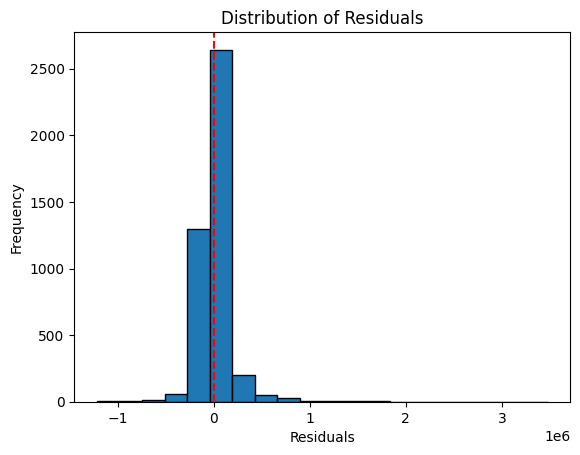

735     -129615.586207
2830     153953.448276
4106     -95637.931034
16218     23427.586207
19964       929.310345
             ...      
13674    -74044.931034
20377    125446.551724
8805     -55628.310345
10168    -21396.551724
2522      15858.310345
Name: price, Length: 4323, dtype: float64


In [500]:
k_values = range(1, 30)  # K values to evaluate
evaluate_knn(filtered_X_Scaled, filteredy, k_values=k_values)

Best k by RMSE: 12 with RMSE: 94501.76184451576


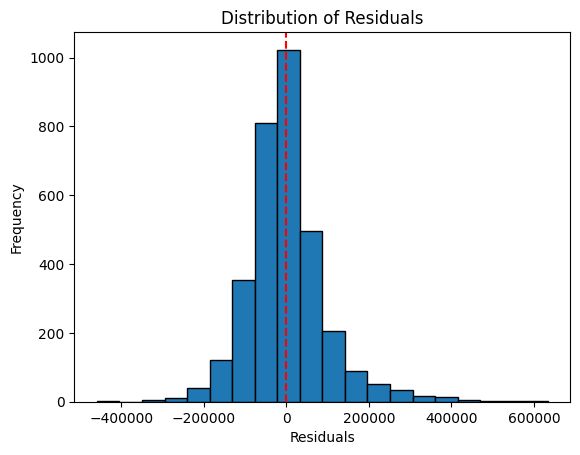

2812     224367.241379
16563    -70120.206897
9830     -84745.448276
1497      29203.241379
19292     11160.000000
             ...      
15979     26951.724138
18947    -28087.931034
17719     16787.931034
19076     -5471.724138
19397     -2218.965517
Name: price, Length: 3280, dtype: float64


In [501]:
k_values = range(1, 30)  # K values to evaluate
evaluate_knn(no_Outliers_X_Scaled, no_Outliers_y, k_values=k_values)

Best k by RMSE: 8 with RMSE: 90185.12894621181


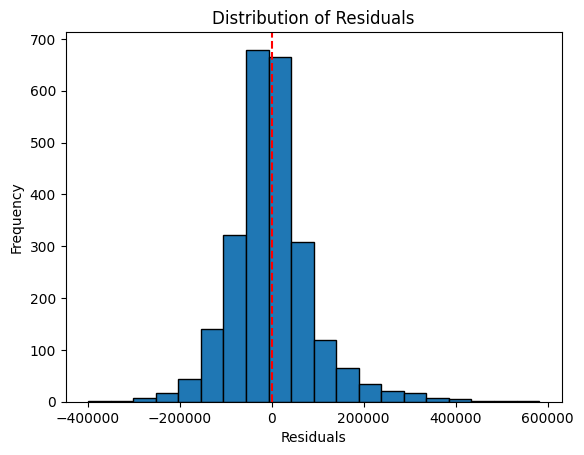

2812     204586.048331
16563    -53305.134353
9830     -78052.355364
1497      21666.775014
19292    -19566.009252
             ...      
14751     54697.515665
9557      62216.807212
6597     -41653.257655
11522    126424.295981
21262     52339.845284
Name: price, Length: 2460, dtype: float64


In [506]:
k_values = range(1, 30)  # K values to evaluate
evaluate_knn(X_min_max_scaled, no_Outliers_y, k_values=k_values)